In [4]:
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
hotel_df = pd.read_csv("hotel_bookings.csv")

In [6]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


The dataset contains data from July 1st 2015 to August 31st 2017.

In [7]:
hotel_df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

This data set has data about 2 hotels; City Hotel and Resort Hotel

# EDA

In [8]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# % of missing values in each column
hotel_df.isnull().sum()*100.0/hotel_df.shape[0]

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

0.003% missing values in children column (assume no children in these bookings), 0.408% missing values in country column, 13.7% missing values in agent column (assume an agent was not used for these bookings), and 94.3% missing values in company column.

In [10]:
# drop the column with 94% missing values - company
hotel_df.drop('company', axis=1, inplace=True)

In [11]:
#replace missing values with values that make sense (based on the above assumptions)
missing_replacements = {'children': 0.0, 'country': 'Unknown', 'agent': 0.0}
hotel_df = hotel_df.fillna(missing_replacements)

In [12]:
# Wanted to see the growth over time. Had to add the column before removing rows.

hotel_df['YR_MNTH_ind'] = 'NA'
for i in range(0,len(hotel_df['arrival_date_year'])):
  hotel_df['YR_MNTH_ind'][i] =str(hotel_df['arrival_date_year'][i]) + '-' + str(hotel_df['arrival_date_month'][i])

C:\Users\rawin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Explore guests:

In [13]:
hotel_df['number_of_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

In [14]:
len(hotel_df[hotel_df['number_of_guests'] == 0])
#180 rows with no guests in the booking - we will remove these rows

180

In [15]:
hotel_df.drop(hotel_df[hotel_df['number_of_guests'] == 0].index, inplace=True)

In [16]:
#Download CSV version of clean Data

# from google.colab import files
# hotel_df.to_csv("Price_Rev_Hotel_Clean.csv", sep="\t") 
# files.download('Price_Rev_Hotel_Clean.csv')

In [17]:
hotel_df.columns.values

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'YR_MNTH_ind',
       'number_of_guests'], dtype=object)

In [18]:
quant_cols = list(hotel_df.select_dtypes(include=['int64','float64']))
quant_cols = [x for x in quant_cols if x != 'is_canceled' and x != 'is_repeated_guest'] # remove dummy variable columns as well
hotel_df[quant_cols].describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,number_of_guests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.087191,0.137094,0.218799,74.889078,2.321215,101.969092,0.062553,0.571504,1.971210
std,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.844918,1.498137,0.638504,107.168884,17.598002,50.434007,0.245360,0.792876,0.718876
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.500000,0.000000,0.000000,2.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.950000,0.000000,0.000000,2.000000
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


In [19]:
quant_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'number_of_guests']

## Visualize cancellation counts by hotel:

Text(0, 0.5, 'Number of bookings')

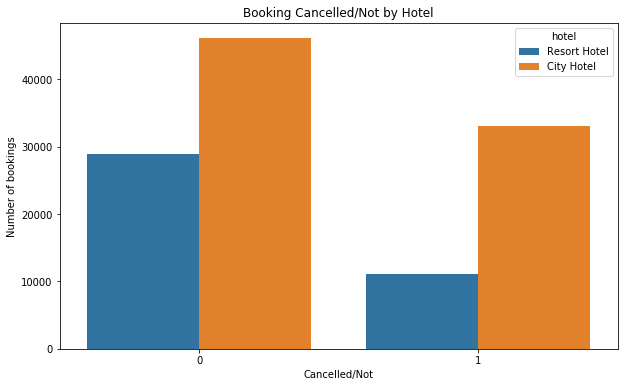

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'is_canceled', hue="hotel", data=hotel_df)
plt.title("Booking Cancelled/Not by Hotel")
plt.xlabel("Cancelled/Not")
plt.ylabel("Number of bookings")

City Hotel gets a lot more bookings in general compared to the Resort Hotel. 

## Explore number of guests arrivals at the two hotels:
To explore the guests who visit the 2 hotels, we will only look at the guests who do not cancel.

In [21]:
resort_guests = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
city_guests = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]

Guest arrivals by month:

In [22]:
resort_guests_monthly = resort_guests.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_guests.groupby("arrival_date_month")["hotel"].count()

monthly_guests = pd.DataFrame({'month':resort_guests_monthly.index,
                               'resort_guests':resort_guests_monthly.values,
                               'city_guests': city_guests_monthly.values})

In [23]:
months_in_order =  ["January", "February", "March", "April", "May", "June", 
                   "July", "August", "September", "October", "November", "December"]
monthly_guests['month'] = pd.Categorical(monthly_guests['month'], categories=months_in_order, ordered=True)
monthly_guests = monthly_guests.sort_values(by='month')

Because the dataset spans from July 2015 to August 2017, it contains data for July and August for 3 years and for the rest of the months for 2 years. Therefore, we need to standardize the counts.

In [24]:
monthly_guests.loc[(monthly_guests["month"] == "July") | (monthly_guests["month"] == "August"),
                    ["resort_guests",'city_guests']] /= 3
monthly_guests.loc[~((monthly_guests["month"] == "July") | (monthly_guests["month"] == "August")),
                    ["resort_guests",'city_guests']] /= 2

In [25]:
monthly_guests = monthly_guests.set_index('month')

Text(0, 0.5, 'Number of guests')

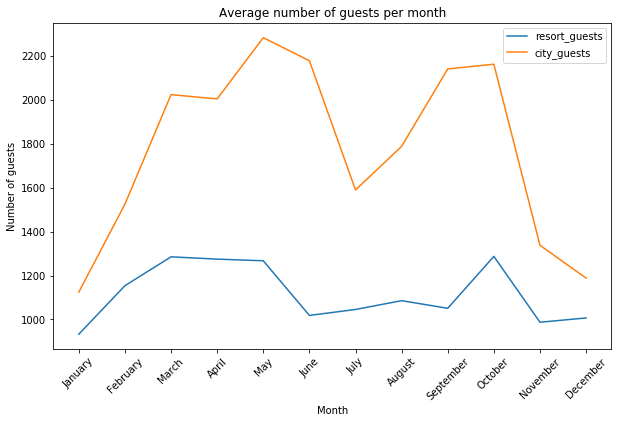

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_guests, dashes=False)
plt.title("Average number of guests per month")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of guests")

As before, we can see that the City Hotel gets a higher number of average guests by month compared to the Resort Hotel. We can also see that May has the highest number of guests closely followed by October, June, and September. Lowest number of guests arrivals occur in January and December.

## Price Variation by Month:



In [27]:
monthly_prices = hotel_df[['hotel','arrival_date_month','adr']].sort_values(by = 'arrival_date_month')


In [28]:
monthly_prices['arrival_date_month'] = pd.Categorical(monthly_prices['arrival_date_month'], 
                                                      categories=months_in_order, ordered=True)

In [29]:
monthly_prices.head()

,hotel,arrival_date_month,adr
109080,City Hotel,April,75.00
109566,City Hotel,April,117.00
109565,City Hotel,April,136.80
109564,City Hotel,April,253.33
109563,City Hotel,April,120.00


Text(0, 0.5, 'Average Price')

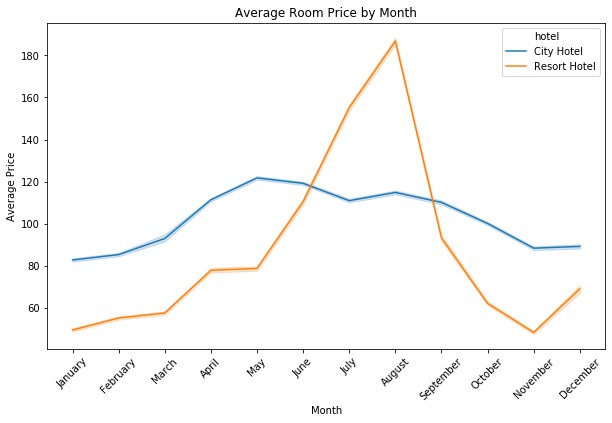

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'arrival_date_month', y='adr', hue='hotel', data=monthly_prices, dashes=False)
plt.title("Average Room Price by Month")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Average Price")

In [31]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,YR_MNTH_ind,number_of_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-July,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-July,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-July,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-July,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-July,2.0


In [32]:
#hotel_df.groupby(['YR_MNTH_ind','is_canceled'])['hotel'].count()

cancel_msk = hotel_df['is_canceled'] == 1

Can_YR_mnth = pd.DataFrame(hotel_df[cancel_msk]['YR_MNTH_ind'].value_counts()).reset_index().rename(columns={'YR_MNTH_ind': 'Cancelations','index':'YR_MNTH_ind'})
#Can_YR_mnth

Tot_YR_mnth = pd.DataFrame(hotel_df['YR_MNTH_ind'].value_counts()).reset_index().rename(columns={'YR_MNTH_ind': 'Total','index':'YR_MNTH_ind'})
#Tot_YR_mnth

both_yr_mnth = pd.merge(Tot_YR_mnth,Can_YR_mnth,on='YR_MNTH_ind')
both_yr_mnth['pct_Canceled'] = both_yr_mnth['Cancelations']/both_yr_mnth['Total']
both_yr_mnth=both_yr_mnth.replace(regex=r'January', value='01')
both_yr_mnth=both_yr_mnth.replace(regex=r'February', value='02')
both_yr_mnth=both_yr_mnth.replace(regex=r'March', value='03')
both_yr_mnth=both_yr_mnth.replace(regex=r'April', value='04')
both_yr_mnth=both_yr_mnth.replace(regex=r'May', value='05')
both_yr_mnth=both_yr_mnth.replace(regex=r'June', value='06')
both_yr_mnth=both_yr_mnth.replace(regex=r'July', value='07')
both_yr_mnth=both_yr_mnth.replace(regex=r'August', value='08')
both_yr_mnth=both_yr_mnth.replace(regex=r'September', value='09')
both_yr_mnth=both_yr_mnth.replace(regex=r'October', value='10')
both_yr_mnth=both_yr_mnth.replace(regex=r'November', value='11')
both_yr_mnth=both_yr_mnth.replace(regex=r'December', value='12')

#both_yr_mnth.replace({'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07',
#                      'August':'08','September':'09','October':'10','November':'11','December':'12',})

both_yr_mnth['Year'] = both_yr_mnth['YR_MNTH_ind'].apply(lambda x: int(x[0:4]))
both_yr_mnth['Month'] = both_yr_mnth['YR_MNTH_ind'].apply(lambda x: int(x[-2:]))

both_yr_mnth=both_yr_mnth.sort_values(by=['Year','Month']).reset_index().drop(columns='index').set_index('YR_MNTH_ind')


Text(0, 0.5, 'Number of guests')

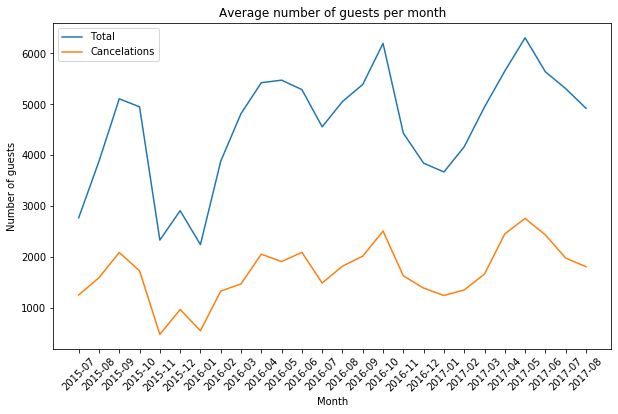

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=both_yr_mnth[['Total','Cancelations']], dashes=False)
plt.title("Average number of guests per month")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of guests")

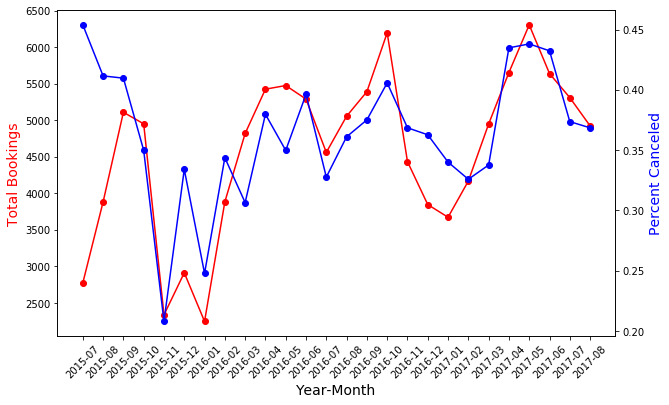

In [34]:
# create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10,6))
# make a plot
ax.plot(both_yr_mnth.index, both_yr_mnth['Total'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year-Month",fontsize=14)
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("Total Bookings",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(both_yr_mnth.index, both_yr_mnth['pct_Canceled'],color="blue",marker="o")
ax2.set_ylabel("Percent Canceled",color="blue",fontsize=14)
plt.xticks(rotation=45)
plt.show()


We can see for majority of the time period, the cancelation percentage of the dataset falls in the 30% - 40% range. Now we want to see if this is the same trend for resort and city hotels. 

In [35]:
hotel_t_can = pd.DataFrame(hotel_df.groupby(by=['hotel','YR_MNTH_ind','is_canceled'])['lead_time'].count()).reset_index()
hotel_t_can=pd.DataFrame(hotel_t_can.pivot_table(index='YR_MNTH_ind', columns=['hotel','is_canceled'], aggfunc='sum'))
hotel_t_can.columns = hotel_t_can.columns.droplevel()
hotel_t_can.columns = hotel_t_can.columns.droplevel()
hotel_t_can.columns = ['City_Stay','City_Canc','Resort_Stay','Resort_Canc']
hotel_t_can['City_Total'] = hotel_t_can['City_Stay'] + hotel_t_can['City_Canc']
hotel_t_can['City_C_Pct'] = hotel_t_can['City_Canc'] / hotel_t_can['City_Total']
hotel_t_can['Resort_Total'] = hotel_t_can['Resort_Stay'] + hotel_t_can['Resort_Canc']
hotel_t_can['Resort_C_Pct'] = hotel_t_can['Resort_Canc'] / hotel_t_can['Resort_Total']
hotel_t_can = hotel_t_can.reset_index().rename(columns={'index':'YR_MNTH_ind'})
hotel_t_can=hotel_t_can.replace(regex=r'January', value='01')
hotel_t_can=hotel_t_can.replace(regex=r'February', value='02')
hotel_t_can=hotel_t_can.replace(regex=r'March', value='03')
hotel_t_can=hotel_t_can.replace(regex=r'April', value='04')
hotel_t_can=hotel_t_can.replace(regex=r'May', value='05')
hotel_t_can=hotel_t_can.replace(regex=r'June', value='06')
hotel_t_can=hotel_t_can.replace(regex=r'July', value='07')
hotel_t_can=hotel_t_can.replace(regex=r'August', value='08')
hotel_t_can=hotel_t_can.replace(regex=r'September', value='09')
hotel_t_can=hotel_t_can.replace(regex=r'October', value='10')
hotel_t_can=hotel_t_can.replace(regex=r'November', value='11')
hotel_t_can=hotel_t_can.replace(regex=r'December', value='12')


hotel_t_can['Year'] = hotel_t_can['YR_MNTH_ind'].apply(lambda x: int(x[0:4]))
hotel_t_can['Month'] = hotel_t_can['YR_MNTH_ind'].apply(lambda x: int(x[-2:]))

hotel_t_can=hotel_t_can.sort_values(by=['Year','Month']).reset_index().drop(columns='index').set_index('YR_MNTH_ind')



Text(0, 0.5, 'Percentage of Bookings Canceled')

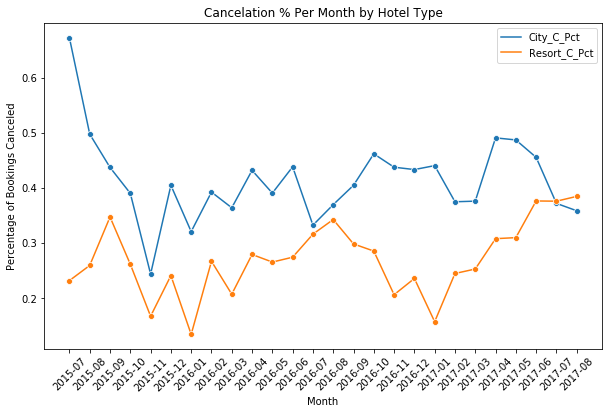

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hotel_t_can[['City_C_Pct','Resort_C_Pct']], dashes=False,marker="o")
plt.title("Cancelation % Per Month by Hotel Type")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Percentage of Bookings Canceled")

We can see that the City cancelation percentage is the main driver in the total pattern above. It makes sense that city hotel bookings we have more cancelations. Business plans could change frequesntly, but a stay at a resort is typically planned for and as a result less likely to cancel. 
